# Normalisation

Assessing different methods for normalising data between plates and cell lines.

In [1]:
from morar import normalise
from morar import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

df = pd.read_csv("/home/scott/SGC_all.csv")

Here we are normalising the entire dataset, though just plotting the negative control values.

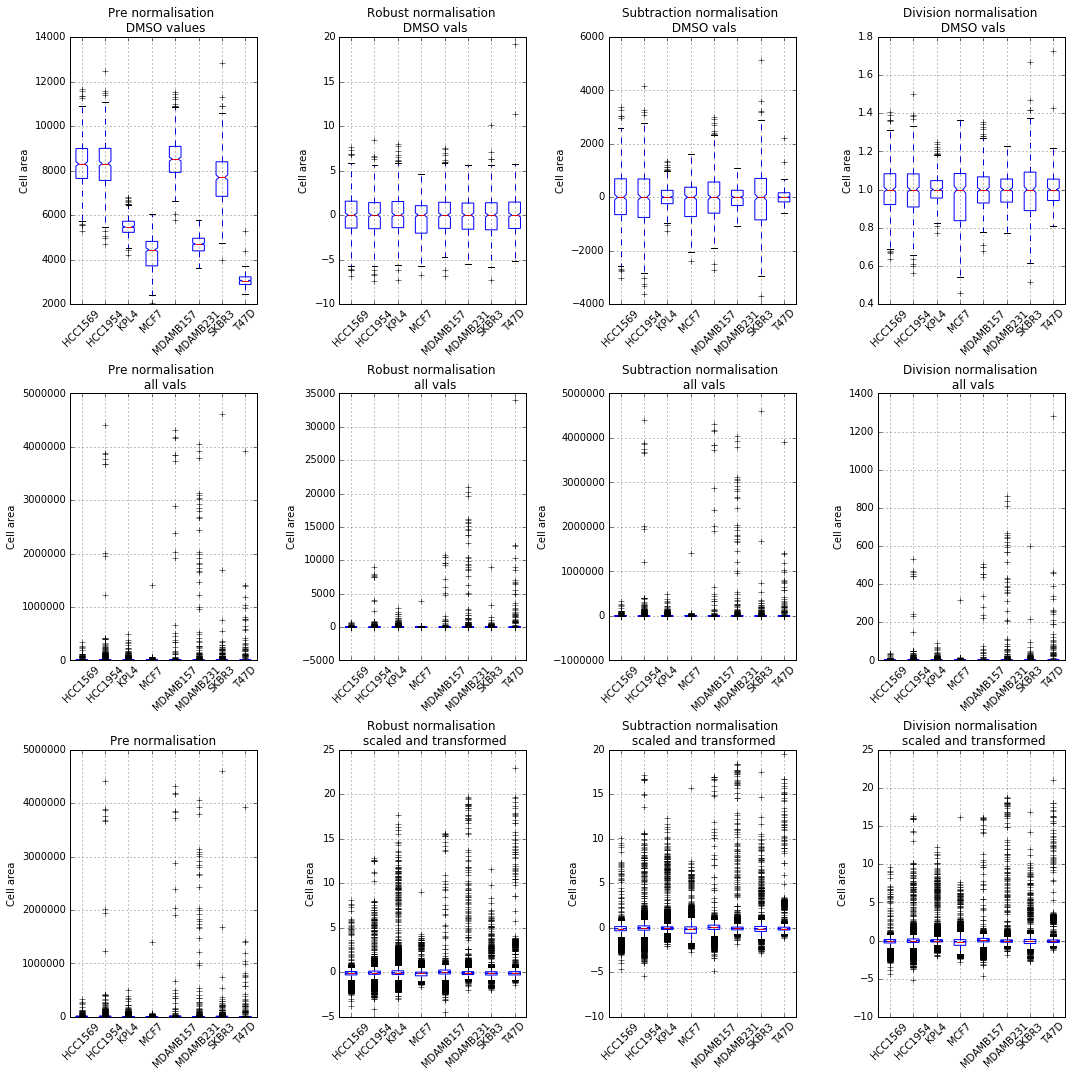

In [2]:
plt.figure(figsize=[15,15])
gs = gridspec.GridSpec(3, 4)


######################################
# DMSO values
######################################

plt.subplot(gs[0,0])
grouped = df.groupby("Metadata_platename")
vals_pre = []
names = []
for name, group in grouped:
    tmp = group[group.Metadata_compound == "DMSO"].Cells_AreaShape_Area.values.tolist()
    vals_pre.append(tmp)
    names.append(name)
plt.boxplot(vals_pre, notch=True, patch_artist=True)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell area")
plt.grid()
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Pre normalisation \n DMSO values")


# remove everything but area and plate names
df_robust = df.copy()
df_robust = df_robust[["Metadata_platename", "Metadata_compound", "Cells_AreaShape_Area"]]
f_cols = ["Cells_AreaShape_Area"]

#df[f_cols] = df[f_cols].applymap(lambda x: stats.glog(x))
df_robust[f_cols] = normalise.robust_normalise(df_robust, plate_id="Metadata_platename")
#df[f_cols] = df[f_cols].apply(stats.z_score)

plt.subplot(gs[0,1])
grouped = df_robust.groupby("Metadata_platename")
vals_post = []
names = []
for name, group in grouped:
    tmp = group[group.Metadata_compound == "DMSO"].Cells_AreaShape_Area.values.tolist()
    vals_post.append(tmp)
    names.append(name)
    
plt.boxplot(vals_post, notch=True, patch_artist=True)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell area")
plt.grid()
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Robust normalisation \n DMSO vals")



# remove everything but area and plate names
df_subtract = df.copy()
df_subtract = df_subtract[["Metadata_platename", "Metadata_compound", "Cells_AreaShape_Area"]]
f_cols = ["Cells_AreaShape_Area"]

#df_subtract[f_cols] = df_subtract[f_cols].applymap(lambda x: stats.glog(x))
df_subtract[f_cols] = normalise.normalise(df_subtract, plate_id="Metadata_platename", method="subtract")
#df_subtract[f_cols] = df_subtract[f_cols].apply(stats.z_score)

plt.subplot(gs[0,2])
grouped = df_subtract.groupby("Metadata_platename")
vals_post = []
names = []
for name, group in grouped:
    tmp = group[group.Metadata_compound == "DMSO"].Cells_AreaShape_Area.values.tolist()
    vals_post.append(tmp)
    names.append(name)
    
plt.boxplot(vals_post, notch=True, patch_artist=True)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell area")
plt.grid()
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Subtraction normalisation \n DMSO vals")



# remove everything but area and plate names
df_divide = df.copy()
df_divide = df_divide[["Metadata_platename", "Metadata_compound", "Cells_AreaShape_Area"]]
f_cols = ["Cells_AreaShape_Area"]

#df_divide[f_cols] = df_divide[f_cols].applymap(lambda x: stats.glog(x))
df_divide[f_cols] = normalise.normalise(df_divide, plate_id="Metadata_platename", method="divide")
#df_divide[f_cols] = df_divide[f_cols].apply(stats.z_score)

plt.subplot(gs[0,3])
grouped = df_divide.groupby("Metadata_platename")
vals_post = []
names = []
for name, group in grouped:
    tmp = group[group.Metadata_compound == "DMSO"].Cells_AreaShape_Area.values.tolist()
    vals_post.append(tmp)
    names.append(name)
    
plt.boxplot(vals_post, notch=True, patch_artist=True)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell area")
plt.grid()
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Division normalisation \n DMSO vals")


##################################################
# All values
##################################################



plt.subplot(gs[1,0])
grouped = df.groupby("Metadata_platename")
vals_pre = []
names = []
for name, group in grouped:
    tmp = group.Cells_AreaShape_Area.values.tolist()
    vals_pre.append(tmp)
    names.append(name)
plt.boxplot(vals_pre, notch=True, patch_artist=True)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell area")
plt.grid()
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Pre normalisation \n all vals")


# remove everything but area and plate names
df_robust = df.copy()
df_robust = df_robust[["Metadata_platename", "Metadata_compound", "Cells_AreaShape_Area"]]
f_cols = ["Cells_AreaShape_Area"]

#df[f_cols] = df[f_cols].applymap(lambda x: stats.glog(x))
df_robust[f_cols] = normalise.robust_normalise(df_robust, plate_id="Metadata_platename")
#df[f_cols] = df[f_cols].apply(stats.z_score)

plt.subplot(gs[1,1])
grouped = df_robust.groupby("Metadata_platename")
vals_post = []
names = []
for name, group in grouped:
    tmp = group.Cells_AreaShape_Area.values.tolist()
    vals_post.append(tmp)
    names.append(name)
    
plt.boxplot(vals_post, notch=True, patch_artist=True)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell area")
plt.grid()
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Robust normalisation \n all vals")



# remove everything but area and plate names
df_subtract = df.copy()
df_subtract = df_subtract[["Metadata_platename", "Metadata_compound", "Cells_AreaShape_Area"]]
f_cols = ["Cells_AreaShape_Area"]

#df_subtract[f_cols] = df_subtract[f_cols].applymap(lambda x: stats.glog(x))
df_subtract[f_cols] = normalise.normalise(df_subtract, plate_id="Metadata_platename", method="subtract")
#df_subtract[f_cols] = df_subtract[f_cols].apply(stats.z_score)

plt.subplot(gs[1,2])
grouped = df_subtract.groupby("Metadata_platename")
vals_post = []
names = []
for name, group in grouped:
    tmp = group.Cells_AreaShape_Area.values.tolist()
    vals_post.append(tmp)
    names.append(name)
    
plt.boxplot(vals_post, notch=True, patch_artist=True)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell area")
plt.grid()
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Subtraction normalisation \n all vals")




# remove everything but area and plate names
df_divide = df.copy()
df_divide = df_divide[["Metadata_platename", "Metadata_compound", "Cells_AreaShape_Area"]]
f_cols = ["Cells_AreaShape_Area"]

#df_divide[f_cols] = df_divide[f_cols].applymap(lambda x: stats.glog(x))
df_divide[f_cols] = normalise.normalise(df_divide, plate_id="Metadata_platename", method="divide")
#df_divide[f_cols] = df_divide[f_cols].apply(stats.z_score)

plt.subplot(gs[1,3])
grouped = df_divide.groupby("Metadata_platename")
vals_post = []
names = []
for name, group in grouped:
    tmp = group.Cells_AreaShape_Area.values.tolist()
    vals_post.append(tmp)
    names.append(name)
    
plt.boxplot(vals_post, notch=True, patch_artist=True)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell area")
plt.grid()
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Division normalisation \n all vals")




##############################################
# All values pre-transformed and then scaled
#############################################


plt.subplot(gs[2,0])
grouped = df.groupby("Metadata_platename")
vals_pre = []
names = []
for name, group in grouped:
    tmp = group.Cells_AreaShape_Area.values.tolist()
    vals_pre.append(tmp)
    names.append(name)
plt.boxplot(vals_pre, notch=True, patch_artist=True)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell area")
plt.grid()
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Pre normalisation")


# remove everything but area and plate names
df_robust = df.copy()
df_robust = df_robust[["Metadata_platename", "Metadata_compound", "Cells_AreaShape_Area"]]
f_cols = ["Cells_AreaShape_Area"]

df_robust[f_cols] = df_robust[f_cols].applymap(lambda x: stats.glog(x))
df_robust[f_cols] = normalise.robust_normalise(df_robust, plate_id="Metadata_platename")
df_robust[f_cols] = df_robust[f_cols].apply(stats.z_score)

plt.subplot(gs[2,1])
grouped = df_robust.groupby("Metadata_platename")
vals_post = []
names = []
for name, group in grouped:
    tmp = group.Cells_AreaShape_Area.values.tolist()
    vals_post.append(tmp)
    names.append(name)
    
plt.boxplot(vals_post, notch=True, patch_artist=True)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell area")
plt.grid()
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Robust normalisation \n scaled and transformed")



# remove everything but area and plate names
df_subtract = df.copy()
df_subtract = df_subtract[["Metadata_platename", "Metadata_compound", "Cells_AreaShape_Area"]]
f_cols = ["Cells_AreaShape_Area"]

df_subtract[f_cols] = df_subtract[f_cols].applymap(lambda x: stats.glog(x))
df_subtract[f_cols] = normalise.normalise(df_subtract, plate_id="Metadata_platename", method="subtract")
df_subtract[f_cols] = df_subtract[f_cols].apply(stats.z_score)

plt.subplot(gs[2,2])
grouped = df_subtract.groupby("Metadata_platename")
vals_post = []
names = []
for name, group in grouped:
    tmp = group.Cells_AreaShape_Area.values.tolist()
    vals_post.append(tmp)
    names.append(name)
    
plt.boxplot(vals_post, notch=True, patch_artist=True)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell area")
plt.grid()
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Subtraction normalisation \n scaled and transformed")




# remove everything but area and plate names
df_divide = df.copy()
df_divide = df_divide[["Metadata_platename", "Metadata_compound", "Cells_AreaShape_Area"]]
f_cols = ["Cells_AreaShape_Area"]

df_divide[f_cols] = df_divide[f_cols].applymap(lambda x: stats.glog(x))
df_divide[f_cols] = normalise.normalise(df_divide, plate_id="Metadata_platename", method="divide")
df_divide[f_cols] = df_divide[f_cols].apply(stats.z_score)

plt.subplot(gs[2,3])
grouped = df_divide.groupby("Metadata_platename")
vals_post = []
names = []
for name, group in grouped:
    tmp = group.Cells_AreaShape_Area.values.tolist()
    vals_post.append(tmp)
    names.append(name)
    
plt.boxplot(vals_post, notch=True, patch_artist=True)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell area")
plt.grid()
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Division normalisation \n scaled and transformed")

plt.tight_layout()

plt.show()
